# Описание датасета — `roulette_100_rounds`

**Краткое резюме**

* **Предметная область:** рулетка / моделирование игровых раундов.
* **Источник данных:** симулирование рулетки с использованием Python
* **Характер данных:** сгенерированные симулятором.


<center>
  <img src="data/rlt.png" alt="image" />
</center>


# Содержание и структура датасета

* **Число строк (раундов):** 100
* **Число столбцов (атрибутов):** 8
* **Используемый формат:** CSV (разделитель — запятая), первая строка — заголовки столбцов.

## Перечень атрибутов
<div align="center">

| Атрибут          |           Тип данных            | Что обозначает                                                                         | Примерные значения (из файла)     |
| ---------------- |:------------------------------:|:-------------------------------------------------------------------------------------:|:--------------------------------:|
| `Round`          |        числовой (int)          | Номер раунда / последовательный индекс                                                 | 1, 2, ..., 10                    |
| `Winning Number` |        числовой (int)          | Выпавшее число на колесе рулетки (обычно 0–36)                                         | 3, 5, 0, 26, 11, 7, 33, 22, 26, 3|
| `Winning Color`  |  строковый (категориальный)     | Цвет, соответствующий выпавшему числу (обычно "Red", "Black", иногда "Green" для нуля) | Red, Black                       |
| `Red Bet Win`    | числовой (int, бинарный индикатор)| Результат ставки на красное: 1 — ставка выиграла, 0 — не выиграла                      | 1 или 0                          |
| `Black Bet Win`  | числовой (int, бинарный индикатор)| Результат ставки на чёрное: 1 — выигрыш, 0 — нет                                       | 1 или 0                          |
| `Even Bet Win`   | числовой (int, бинарный индикатор)| Результат ставки на чётное число: 1 — выигрыш, 0 — нет                                 | 1 или 0                          |
| `Odd Bet Win`    | числовой (int, бинарный индикатор)| Результат ставки на нечётное число: 1 — выигрыш, 0 — нет                               | 1 или 0                          |
| `Zero Bet Win`   | числовой (int, бинарный индикатор)| Результат ставки на ноль: 1 — если выпал 0, иначе 0                                    | 0 (в большинстве строк)          |

</div>

> Примечание: бинарные индикаторы в датасете представлены как `0`/`1` (целые числа). Если в задаче потребуется, их можно преобразовать в булевы значения.

---

# Комментарии по признакам и целостности

* Столбец `Winning Number` целочисленный и совпадает с индикаторами выигрыша: когда `Winning Number == 0`, ожидается `Zero Bet Win == 1` и одновременно `Red Bet Win == Black Bet Win == 0`.
* Колонка `Winning Color` содержит категории (`Red`/`Black`). Ноль (`0`) в европейской/французской рулетке обычно считается зелёным — в датасете цвет для нуля может быть представлен как `Green` или оставлен пустым; в просмотренных примерах значение `Winning Color` для нуля отсутствует в примерах (в файле есть ноль, но `Winning Color` у него может быть `Green` или другой маркер). Проверьте консистентность цветовой метки для нуля при подготовке данных.
* Данные уже содержат готовые индикаторы выигрышей по основным типам ставок (Red/Black, Even/Odd, Zero), что удобно для обучения моделей классификации/оценки коэффициентов или для валидации логики расчёта выплат.

---



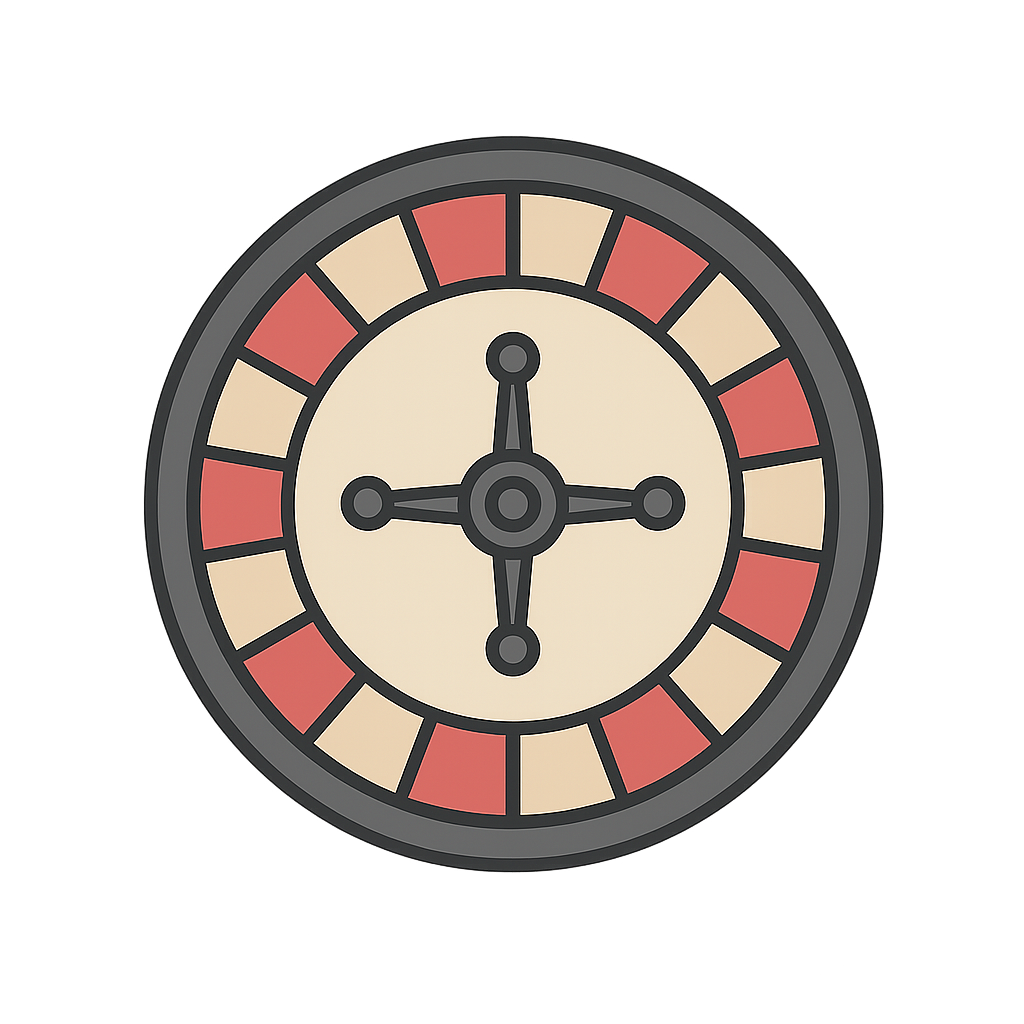
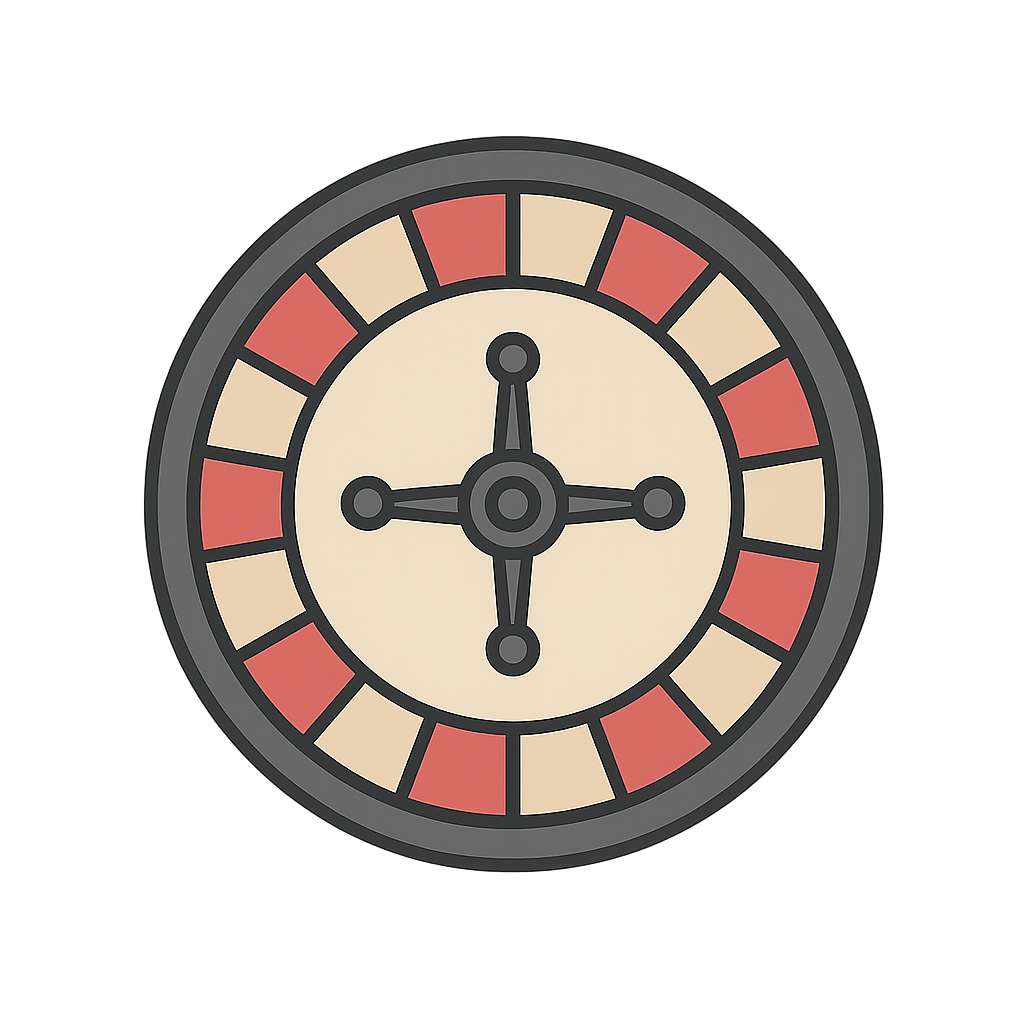
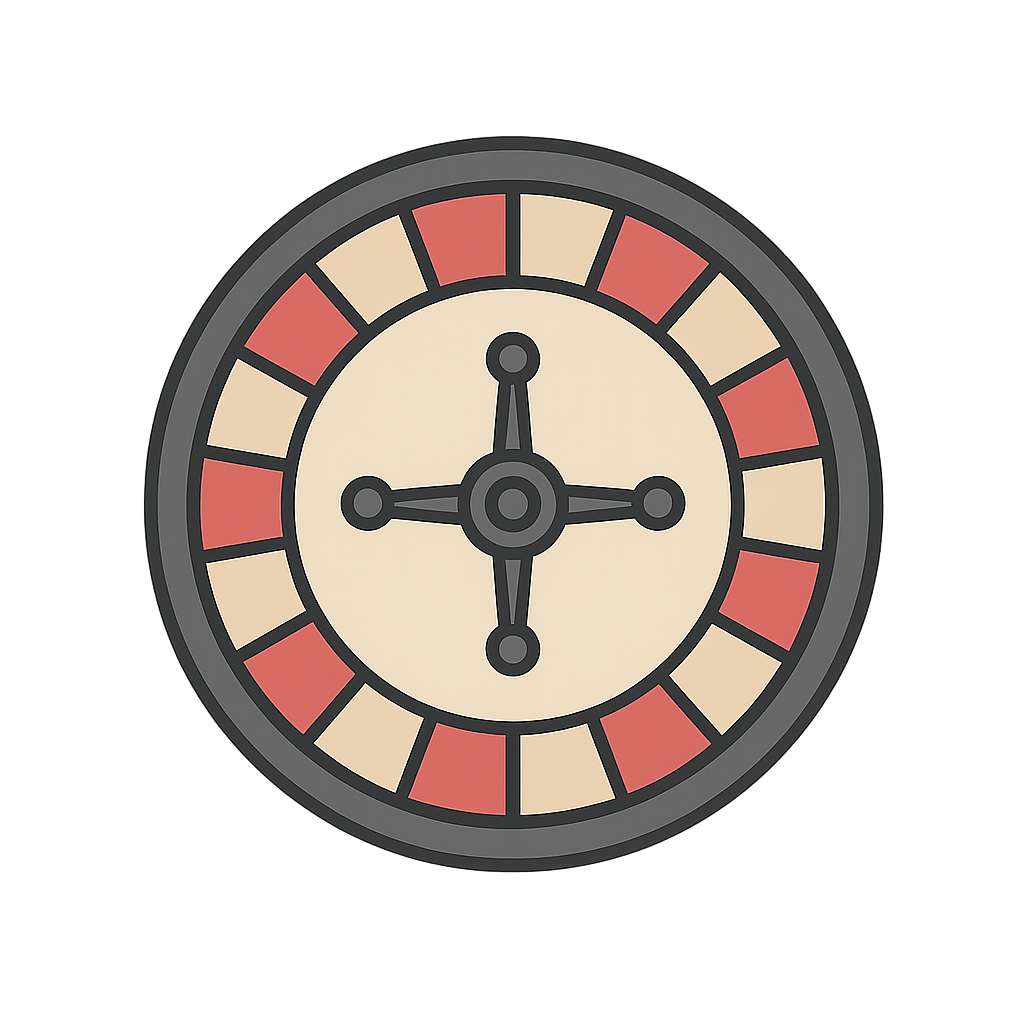

In [5]:
import pandas as pd
path = "data/roulette_100_rounds.csv"   # замените на ваш путь к 100000-строчному файлу
df = pd.read_csv(path)

numeric_cols = ['Round','Winning Number','Red Bet Win','Black Bet Win','Even Bet Win','Odd Bet Win','Zero Bet Win']

# сводка: mean, std, min, max, missing, count
summary = df[numeric_cols].agg(['mean','std','min','max']).T
summary['missing'] = df.isna().sum().reindex(summary.index)
summary['count'] = df.shape[0]
print("Быстрый отчет: " + str(summary))

Быстрый отчет:                  mean        std  min    max  missing  count
Round           50.50  29.011492  1.0  100.0        0    100
Winning Number  18.77  10.833781  0.0   36.0        0    100
Red Bet Win      0.45   0.500000  0.0    1.0        0    100
Black Bet Win    0.51   0.502418  0.0    1.0        0    100
Even Bet Win     0.49   0.502418  0.0    1.0        0    100
Odd Bet Win      0.47   0.501614  0.0    1.0        0    100
Zero Bet Win     0.04   0.196946  0.0    1.0        0    100



------------------------------------------------------------
Атрибут: Round | dtype: int64
Пропущенные: 0
mean=50.5000, std=28.8661, min=1, max=100
IQR границы: [-48.5, 149.5] -> выбросов (IQR): 0
Выбросов по Z-score (>3): 0


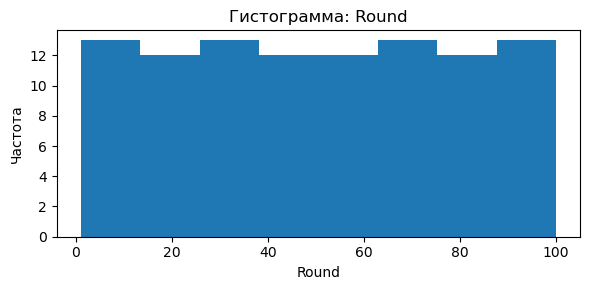


------------------------------------------------------------
Атрибут: Winning Number | dtype: int64
Пропущенные: 0
mean=18.7700, std=10.7795, min=0, max=36
IQR границы: [-18.5, 57.5] -> выбросов (IQR): 0
Выбросов по Z-score (>3): 0


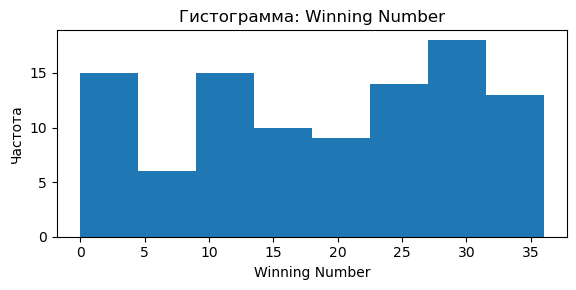


------------------------------------------------------------
Атрибут: Winning Color | dtype: object
Пропущенные: 0
Winning Color
Black    51
Red      45
Green     4
Name: count, dtype: int64


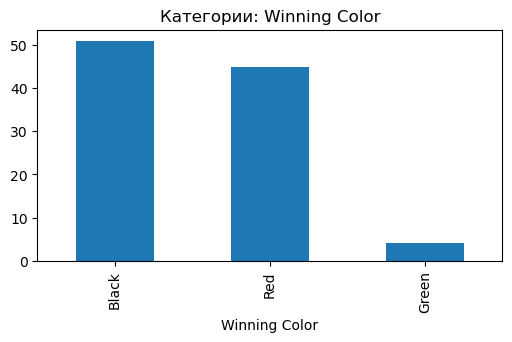


------------------------------------------------------------
Атрибут: Red Bet Win | dtype: int64
Пропущенные: 0
mean=0.4500, std=0.4975, min=0, max=1
IQR границы: [-1.5, 2.5] -> выбросов (IQR): 0
Выбросов по Z-score (>3): 0


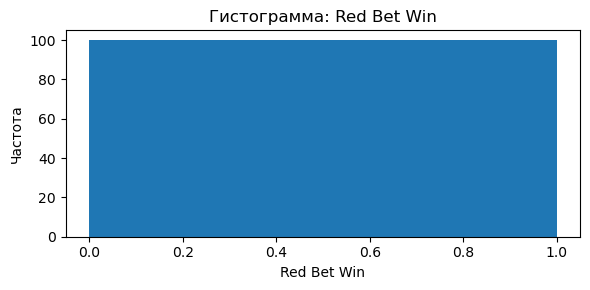


------------------------------------------------------------
Атрибут: Black Bet Win | dtype: int64
Пропущенные: 0
mean=0.5100, std=0.4999, min=0, max=1
IQR границы: [-1.5, 2.5] -> выбросов (IQR): 0
Выбросов по Z-score (>3): 0


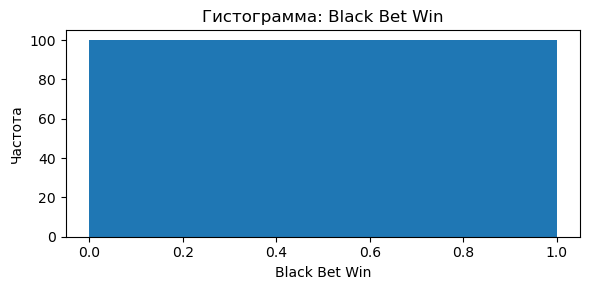


------------------------------------------------------------
Атрибут: Even Bet Win | dtype: int64
Пропущенные: 0
mean=0.4900, std=0.4999, min=0, max=1
IQR границы: [-1.5, 2.5] -> выбросов (IQR): 0
Выбросов по Z-score (>3): 0


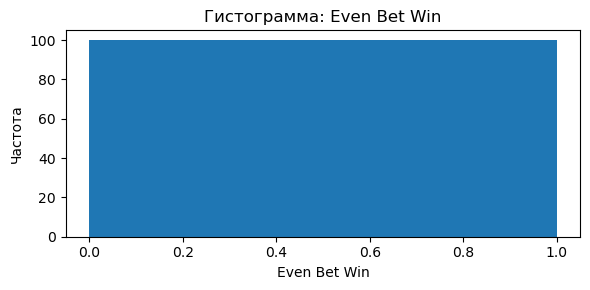


------------------------------------------------------------
Атрибут: Odd Bet Win | dtype: int64
Пропущенные: 0
mean=0.4700, std=0.4991, min=0, max=1
IQR границы: [-1.5, 2.5] -> выбросов (IQR): 0
Выбросов по Z-score (>3): 0


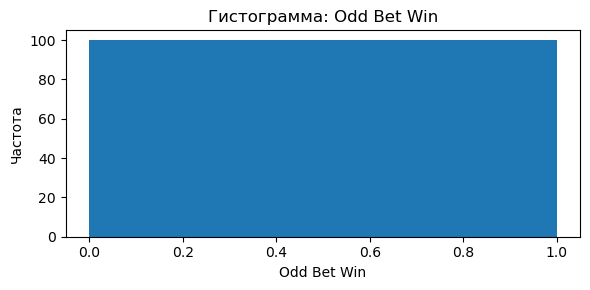


------------------------------------------------------------
Атрибут: Zero Bet Win | dtype: int64
Пропущенные: 0
mean=0.0400, std=0.1960, min=0, max=1
IQR границы: [0.0, 0.0] -> выбросов (IQR): 4
Выбросов по Z-score (>3): 4


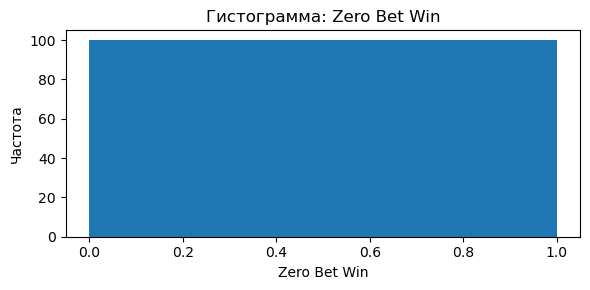

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

df = pd.read_csv("data/roulette_100_rounds.csv")

numeric_cols = ['Round','Winning Number','Red Bet Win','Black Bet Win','Even Bet Win','Odd Bet Win','Zero Bet Win']
cat_cols = ['Winning Color']

# Для каждого атрибута: mean, std, missing, гист
for col in df.columns:
    print("\n" + "-"*60)
    print("Атрибут:", col, "| dtype:", df[col].dtype)
    miss = df[col].isna().sum()
    print("Пропущенные:", miss)
    if col in numeric_cols:
        s = df[col].dropna()
        mean = s.mean(); std = s.std(ddof=0)
        print(f"mean={mean:.4f}, std={std:.4f}, min={s.min()}, max={s.max()}")
        # IQR-выбросы
        q1 = s.quantile(0.25); q3 = s.quantile(0.75); iqr = q3 - q1
        lower = q1 - 1.5*iqr; upper = q3 + 1.5*iqr
        out_iqr = s[(s < lower) | (s > upper)]
        print(f"IQR границы: [{lower}, {upper}] -> выбросов (IQR): {out_iqr.shape[0]}")
        # Z-score
        if std != 0:
            z = (s - mean)/std
            out_z = s[z.abs() > 3]
            print("Выбросов по Z-score (>3):", out_z.shape[0])
        # гистограмма
        plt.figure(figsize=(6,3))
        plt.hist(s, bins='auto')
        plt.title(f'Гистограмма: {col}')
        plt.xlabel(col); plt.ylabel('Частота')
        plt.tight_layout(); plt.show()
    else:
        print(df[col].value_counts(dropna=False))
        vals = df[col].value_counts(dropna=False)
        plt.figure(figsize=(6,3)); vals.plot(kind='bar'); plt.title(f'Категории: {col}'); plt.show()


                   Round  Winning Number  Red Bet Win  Black Bet Win  \
Round           1.000000       -0.024248     0.108282      -0.091129   
Winning Number -0.024248        1.000000     0.170343      -0.030193   
Red Bet Win     0.108282        0.170343     1.000000      -0.922809   
Black Bet Win  -0.091129       -0.030193    -0.922809       1.000000   
Even Bet Win    0.025987        0.160095     0.038199       0.040416   
Odd Bet Win    -0.009370       -0.020799     0.034233       0.041283   
Zero Bet Win   -0.042429       -0.355436    -0.184637      -0.208248   

                Even Bet Win  Odd Bet Win  Zero Bet Win  
Round               0.025987    -0.009370     -0.042429  
Winning Number      0.160095    -0.020799     -0.355436  
Red Bet Win         0.038199     0.034233     -0.184637  
Black Bet Win       0.040416     0.041283     -0.208248  
Even Bet Win        1.000000    -0.923047     -0.200082  
Odd Bet Win        -0.923047     1.000000     -0.192223  
Zero Bet Win     

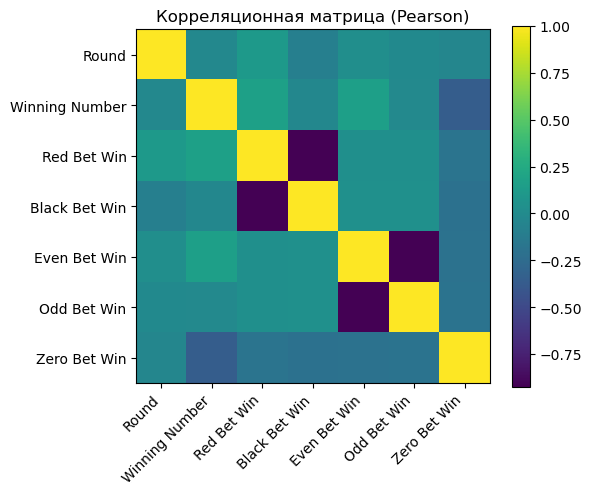

In [8]:
num_df = df[numeric_cols].copy()
corr = num_df.corr(method='pearson')
print(corr)

# пары с |r| >= threshold
threshold = 0.7
high = []
for i,j in combinations(corr.columns,2):
    r = corr.loc[i,j]
    if not np.isnan(r) and abs(r) >= threshold:
        high.append((i,j,r))
print("Высокая корреляция (|r| >= 0.7):", high)

# простая визуализация матрицы (matplotlib)
plt.figure(figsize=(6,5))
plt.imshow(corr, aspect='equal', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Корреляционная матрица (Pearson)')
plt.tight_layout(); plt.show()


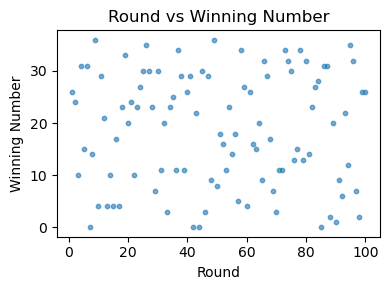

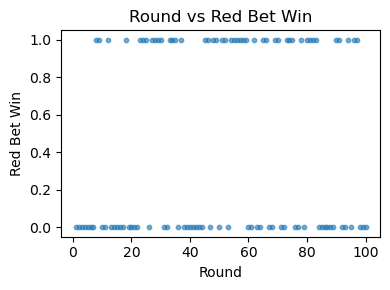

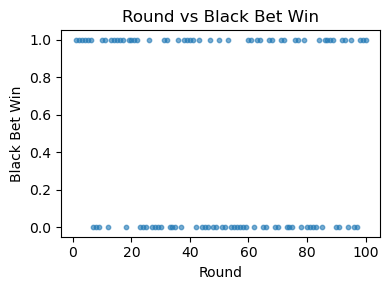

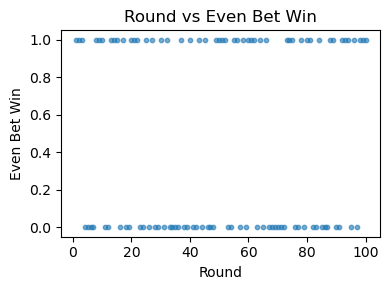

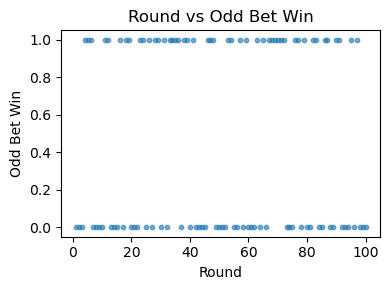

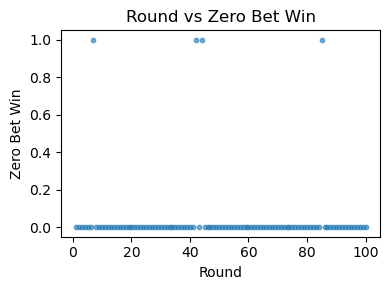

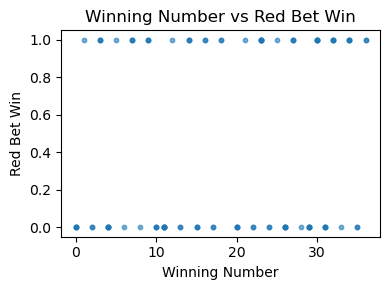

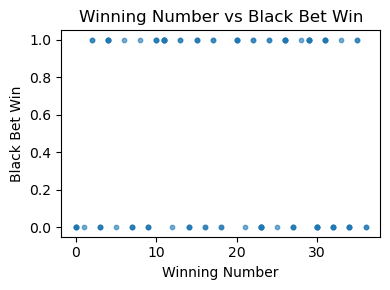

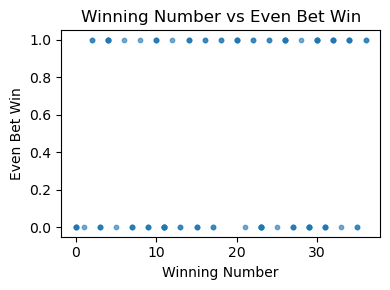

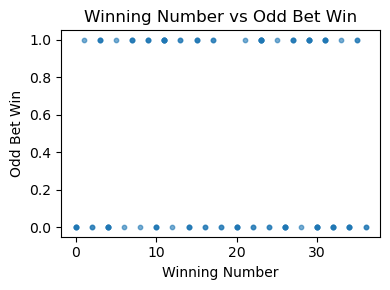

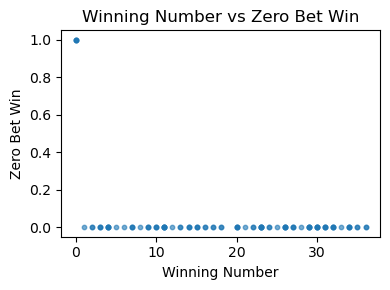

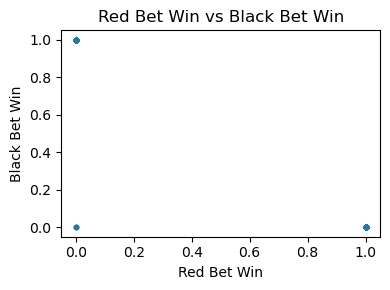

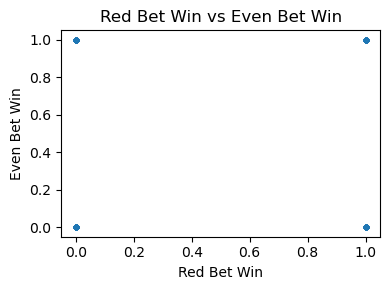

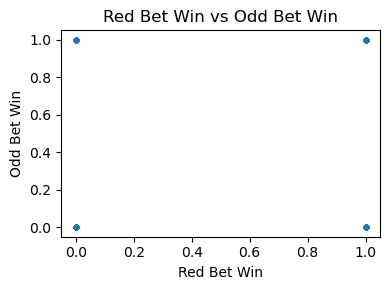

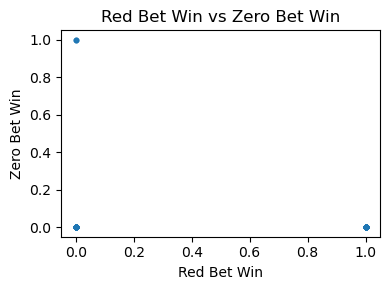

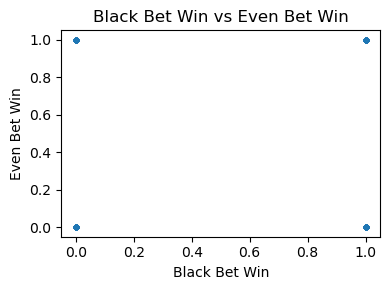

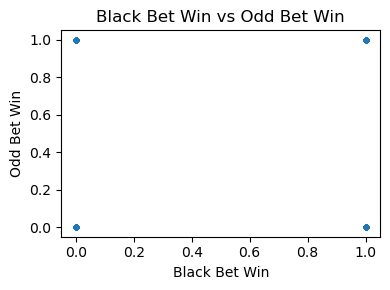

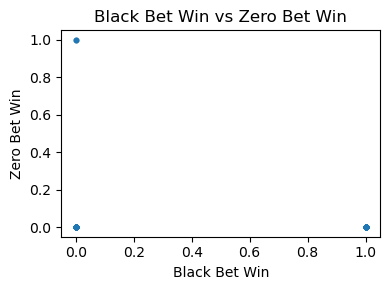

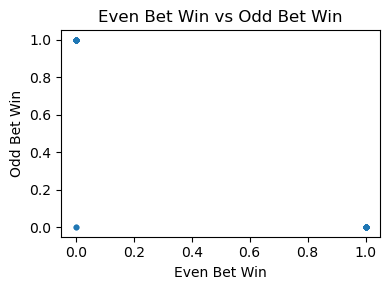

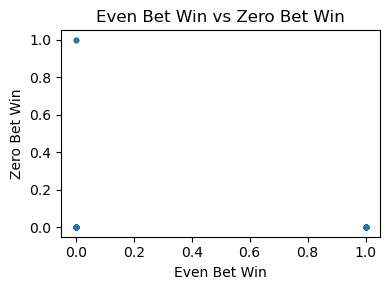

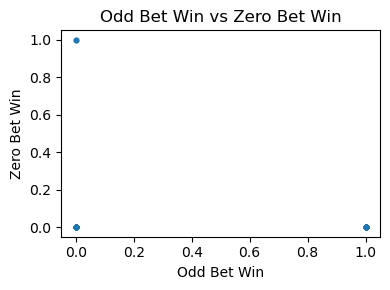

In [9]:
from itertools import combinations
pairs = list(combinations(numeric_cols, 2))
# если данных много: использовать подвыборку, например df.sample(n=5000)
sample_df = df.sample(n=min(5000, len(df)), random_state=1)

for a,b in pairs:
    plt.figure(figsize=(4,3))
    plt.scatter(sample_df[a], sample_df[b], s=10, alpha=0.6)
    plt.xlabel(a); plt.ylabel(b)
    plt.title(f'{a} vs {b}')
    plt.tight_layout(); plt.show()


In [10]:
import numpy as np
import pandas as pd
def cramers_v_from_table(table):
    chi2 = (((table - np.outer(table.sum(axis=1), table.sum(axis=0))/table.sum())**2) /
            np.where(np.outer(table.sum(axis=1), table.sum(axis=0))/table.sum()==0, 1, np.outer(table.sum(axis=1), table.sum(axis=0))/table.sum())).sum().sum()
    n = table.sum().sum()
    phi2 = chi2 / n if n>0 else 0
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1)) if n>1 else phi2
    rcorr = r - ((r-1)**2)/(n-1) if n>1 else r
    kcorr = k - ((k-1)**2)/(n-1) if n>1 else k
    denom = min(kcorr-1, rcorr-1)
    return (phi2corr/denom)**0.5 if denom>0 else 0.0

for bin_col in ['Red Bet Win','Black Bet Win','Even Bet Win','Odd Bet Win','Zero Bet Win']:
    ct = pd.crosstab(df['Winning Color'].astype('category'), df[bin_col])
    v = cramers_v_from_table(ct.values)
    print(bin_col, "Cramer's V =", round(v,4))
    print(ct); print()


Red Bet Win Cramer's V = 0.9949
Red Bet Win     0   1
Winning Color        
Black          51   0
Green           4   0
Red             0  45

Black Bet Win Cramer's V = 0.9949
Black Bet Win   0   1
Winning Color        
Black           0  51
Green           4   0
Red            45   0

Even Bet Win Cramer's V = 0.1415
Even Bet Win    0   1
Winning Color        
Black          25  26
Green           4   0
Red            22  23

Odd Bet Win Cramer's V = 0.1301
Odd Bet Win     0   1
Winning Color        
Black          26  25
Green           4   0
Red            23  22

Zero Bet Win Cramer's V = 0.9949
Zero Bet Win    0  1
Winning Color       
Black          51  0
Green           0  4
Red            45  0

